# **Genomes and Genetics Disorder**

<img src="img\Exp_transmission_ang.jpg" style="width: 550px;" />

### **Types of Genetic Diseases :**
#### 1.Single Gene Disorder
#### 2.Multifactorial Disorder 
#### 3.Mitochondrial Disorder 
#### 4.Chromosomal Disorder 
#### 5.Acquired Somatic Disorder 


In [79]:
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
df=pd.read_csv("dataset/train.csv")
df.shape

(22083, 45)

### STAGE 1  :  Data Perp & cleaning 

In [81]:
# Replace spaces in columns names
df.columns = df.columns.str.replace(' ', '_')

In [82]:
# Downsize text lenght
df["Genetic_Disorder"].replace({'Mitochondrial genetic inheritance disorders': 'Mitochondrial disorders',
                               'Multifactorial genetic inheritance disorders': 'Multifactorial disorders',
                                'Single-gene inheritance diseases': 'Single-gene diseases'},inplace=True)
df.Genetic_Disorder.unique()

array(['Mitochondrial disorders', nan, 'Multifactorial disorders',
       'Single-gene diseases'], dtype=object)

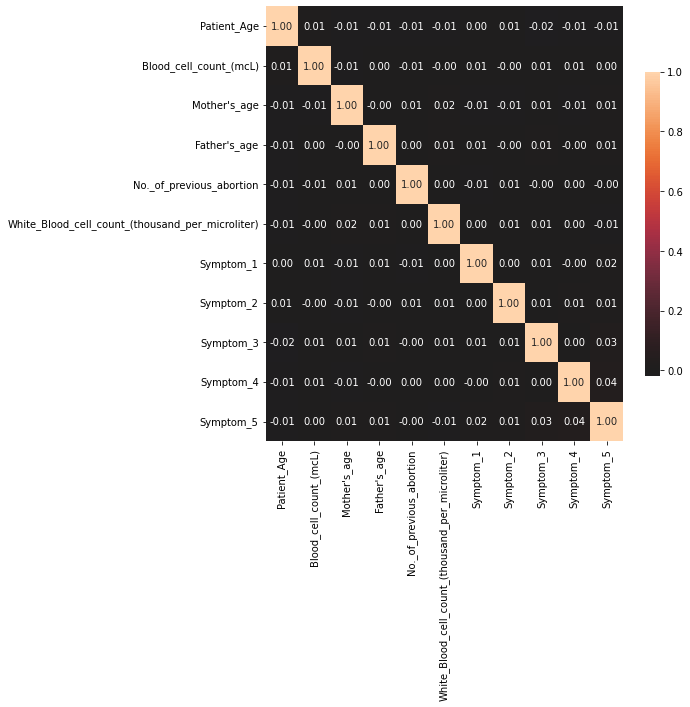

In [86]:

corr = df.corr()

fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(corr, vmax=1.0, center=0, fmt='.2f',
              annot=True, cbar_kws={"shrink": .70})
plt.show()


In [85]:
#Drop all Test columns
df.drop(list(df.filter(regex='Test')),inplace=True,axis=1)
df.shape

(22083, 40)

In [91]:
df.columns

Index(['Patient_Id', 'Patient_Age', 'Genes_in_mother's_side',
       'Inherited_from_father', 'Maternal_gene', 'Paternal_gene',
       'Blood_cell_count_(mcL)', 'Patient_First_Name', 'Family_Name',
       'Father's_name', 'Mother's_age', 'Father's_age', 'Institute_Name',
       'Location_of_Institute', 'Status', 'Respiratory_Rate_(breaths/min)',
       'Heart_Rate_(rates/min', 'Parental_consent', 'Follow-up', 'Gender',
       'Birth_asphyxia', 'Autopsy_shows_birth_defect_(if_applicable)',
       'Place_of_birth', 'Folic_acid_details_(peri-conceptional)',
       'H/O_serious_maternal_illness', 'H/O_radiation_exposure_(x-ray)',
       'H/O_substance_abuse', 'Assisted_conception_IVF/ART',
       'History_of_anomalies_in_previous_pregnancies',
       'No._of_previous_abortion', 'Birth_defects',
       'White_Blood_cell_count_(thousand_per_microliter)', 'Blood_test_result',
       'Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4', 'Symptom_5',
       'Genetic_Disorder', 'Disorder_Subclass'

In [92]:
#Drop uncorrelated features
df.drop(["Patient_Id","Patient_First_Name","Family_Name","Father's_name","Location_of_Institute",
          "Institute_Name"],inplace=True,axis=1)

In [89]:
#TODO: Need to handle null values
df.isna().sum()

Patient_Id                                             0
Patient_Age                                         1427
Genes_in_mother's_side                                 0
Inherited_from_father                                306
Maternal_gene                                       2810
Paternal_gene                                          0
Blood_cell_count_(mcL)                                 0
Patient_First_Name                                     0
Family_Name                                         9691
Father's_name                                          0
Mother's_age                                        6036
Father's_age                                        5986
Institute_Name                                      5106
Location_of_Institute                                  0
Status                                                 0
Respiratory_Rate_(breaths/min)                      2149
Heart_Rate_(rates/min                               2113
Parental_consent               

In [59]:
_df=df.dropna(subset=['Genetic_Disorder','Gender','Patient_Age'])
fig=px.histogram(_df,y=_df["Genetic_Disorder"],color=_df['Gender'],opacity=.80)
fig.show()

In [45]:
df.value_counts(_df.Gender)

Gender
Ambiguous    5726
Male         5703
Female       5606
dtype: int64